<a href="https://colab.research.google.com/github/bhanuteja-cds/Channel_flow_NS/blob/main/numpytest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

# A bit of setup
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(-1.0, 1.0)

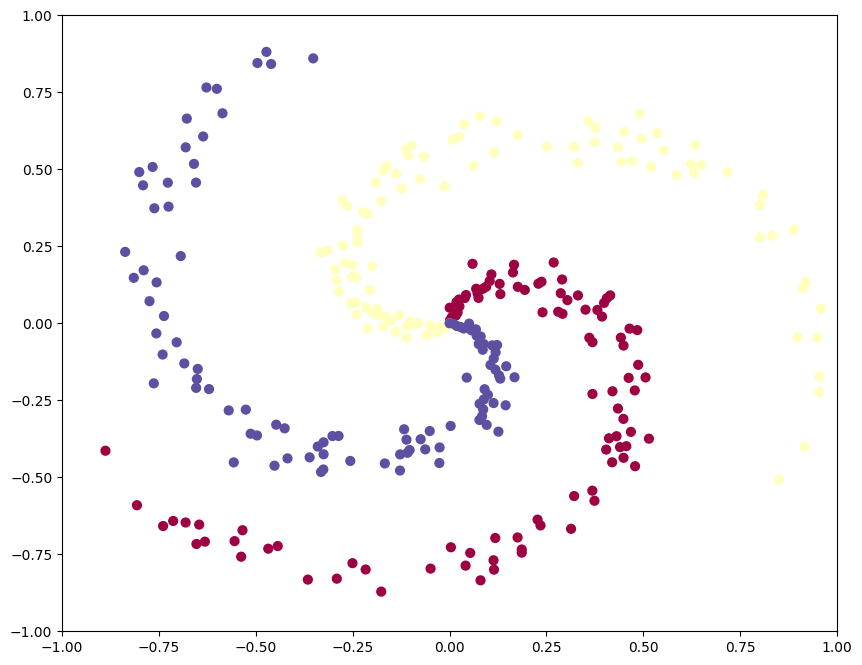

In [6]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

In [10]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):

  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)

  dW += reg*W # regularization gradient

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.099164
iteration 10: loss 0.918010
iteration 20: loss 0.851812
iteration 30: loss 0.822484
iteration 40: loss 0.807664
iteration 50: loss 0.799493
iteration 60: loss 0.794708
iteration 70: loss 0.791781
iteration 80: loss 0.789931
iteration 90: loss 0.788733
iteration 100: loss 0.787942
iteration 110: loss 0.787412
iteration 120: loss 0.787051
iteration 130: loss 0.786804
iteration 140: loss 0.786634
iteration 150: loss 0.786515
iteration 160: loss 0.786432
iteration 170: loss 0.786373
iteration 180: loss 0.786332
iteration 190: loss 0.786302


In [12]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % np.mean(predicted_class == y))

training accuracy: 0.49


(-1.8712034092398278, 1.8687965907601756)

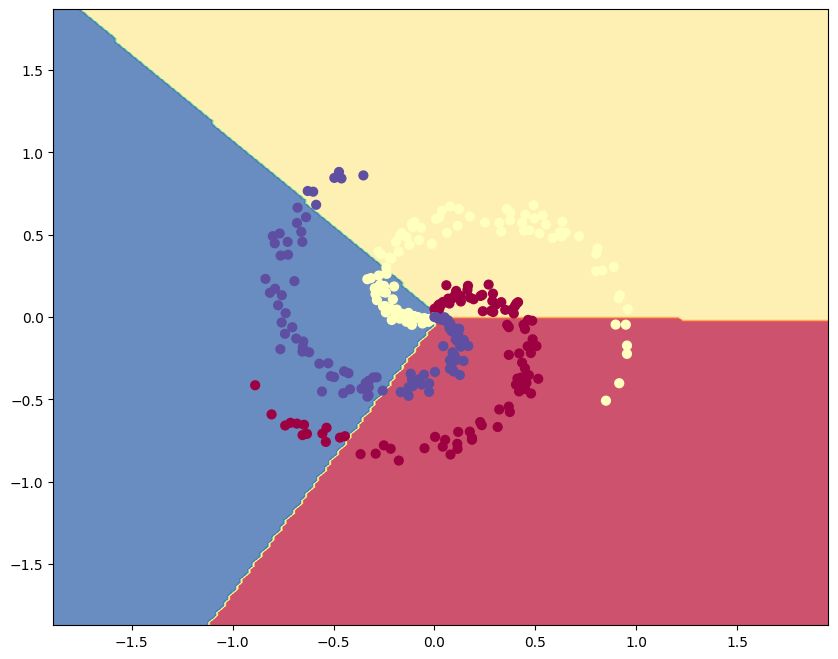

In [13]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

In [17]:

# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-0
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(10000):

  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2

  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))

  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples

  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)

  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W

  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098430
iteration 1000: loss 0.301603
iteration 2000: loss 0.261799
iteration 3000: loss 0.253851
iteration 4000: loss 0.249977
iteration 5000: loss 0.247782
iteration 6000: loss 0.246423
iteration 7000: loss 0.245667
iteration 8000: loss 0.245361
iteration 9000: loss 0.245221


In [19]:

# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % np.mean(predicted_class == y))

training accuracy: 0.98


(-1.8712034092398278, 1.8687965907601756)

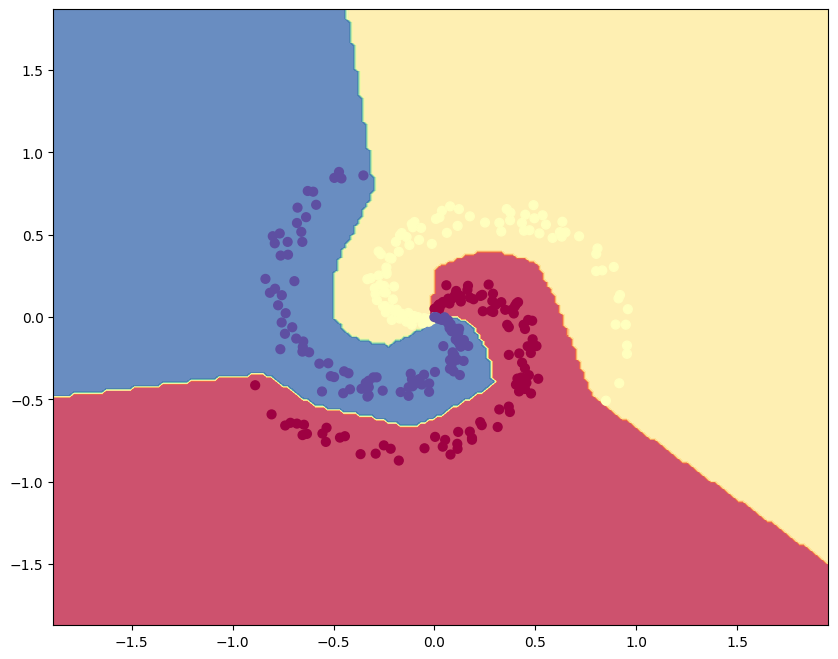

In [20]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')


In [ ]:
a = np.array(42)
b = np.array([1, 2, 3, 4, 5])
c = np.array([[1, 2, 3], [4, 5, 6]])
d = np.array([[[1, 2, 3], [4, 5, 6]], [[1, 2, 3], [4, 5, 6]]])

print(a.ndim)
print(b.ndim)
print(c.ndim)
print(d.ndim)

0
1
2
3


In [ ]:
arr = np.array([1, 2, 3, 4], ndmin=5)

print(arr)
print('number of dimensions :', arr.ndim)

[[[[[1 2 3 4]]]]]
number of dimensions : 5


In [ ]:
arr[0,0,0,0,3]

4

In [ ]:
!git clone https://github.com/ChiragSehra/Handwriting-Recognition-From-Forms-Using-Deep-Learning.git

Cloning into 'Handwriting-Recognition-From-Forms-Using-Deep-Learning'...
remote: Enumerating objects: 77, done.
remote: Counting objects: 100% (77/77), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 77 (delta 17), reused 69 (delta 14), pack-reused 0 (from 0)
Receiving objects: 100% (77/77), 660.21 KiB | 2.25 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
from google.colab import files
files.download("https://guillaumejaume.github.io/FUNSD/dataset.zip")

FileNotFoundError: Cannot find file: https://guillaumejaume.github.io/FUNSD/dataset.zip

In [ ]:
!wget https://guillaumejaume.github.io/FUNSD/dataset.zip

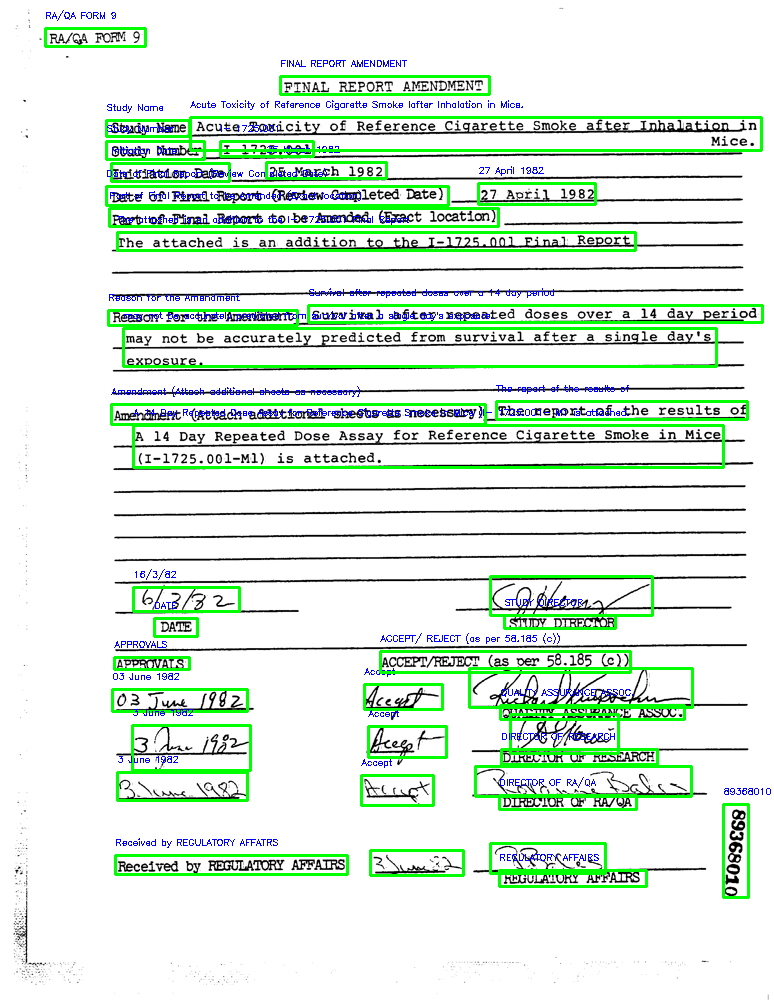

In [ ]:
import cv2
import json
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/89368010.png'
image = cv2.imread(image_path)

# Load the annotations (assuming they're in a JSON file)
annotation_path = '/content/89368010.json'
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

details = annotations['form']

for each in details:
    x1, y1, x2, y2 = each['box']
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, each['text'], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!wget https://github.com/djdhar/Handwritten-and-Printed-Text-Classification-in-Doctors-Prescription/blob/master/Prescription%20Text%20Localization%20and%20Classification/Extended%20Dataset/Other_extended.zip

--2024-09-03 10:10:41--  https://github.com/djdhar/Handwritten-and-Printed-Text-Classification-in-Doctors-Prescription/blob/master/Prescription%20Text%20Localization%20and%20Classification/Extended%20Dataset/Other_extended.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Other_extended.zip’

Other_extended.zip      [ <=>                ] 171.40K  --.-KB/s    in 0.05s   

2024-09-03 10:10:41 (3.37 MB/s) - ‘Other_extended.zip’ saved [175515]



In [ ]:
!wget https://github.com/djdhar/Handwritten-and-Printed-Text-Classification-in-Doctors-Prescription/blob/master/Prescription%20Text%20Localization%20and%20Classification/Extended%20Dataset/Printed_extended.zip

--2024-09-03 10:11:10--  https://github.com/djdhar/Handwritten-and-Printed-Text-Classification-in-Doctors-Prescription/blob/master/Prescription%20Text%20Localization%20and%20Classification/Extended%20Dataset/Printed_extended.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘Printed_extended.zip’

Printed_extended.zi     [ <=>                ] 302.01K  --.-KB/s    in 0.05s   

2024-09-03 10:11:11 (5.76 MB/s) - ‘Printed_extended.zip’ saved [309255]



In [ ]:
from google.colab import files
files.download("/content/Handwritten_extended.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import json
from google.colab.patches import cv2_imshow

# Load the image
image_path = '/content/89368010.png'
image = cv2.imread(image_path)

# Load the annotations (assuming they're in a JSON file)
annotation_path = '/content/89368010.json'
with open(annotation_path, 'r') as f:
    annotations = json.load(f)

details = annotations['form']

for each in details:
    x1, y1, x2, y2 = each['box']
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(image, each['text'], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)

cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import os
import json
import cv2

In [ ]:
%cd /content/drive/MyDrive/dataset/training_data
directory_annotations = '/content/drive/MyDrive/dataset/training_data/annotations'
directory_images = '/content/drive/MyDrive/dataset/training_data/images'
annotation_files = os.listdir(directory_annotations)
image_files = os.listdir(directory_images)
print(annotation_files)

In [ ]:
for each_annotation_file in annotation_files:
  image_path = '/content/drive/MyDrive/dataset/training_data/images/'+each_annotation_file[:-5]+'.png'
  annotation_path = '/content/drive/MyDrive/dataset/training_data/annotations/'+each_annotation_file
  # file_path = '/content/drive/MyDrive/dataset/training_data/images/'+each_annotation_file[:-5]+'.txt'
  image = cv2.imread(image_path)
  height, width, channels = image.shape

  with open(annotation_path, 'r') as f:
    annotations = json.load(f)
    details = annotations['form']
    txt_file_path = '/content/drive/MyDrive/dataset/training_data/images/'+each_annotation_file[:-5]+'.txt'
    with open(txt_file_path, 'w', newline='') as file1:
      for each in details:
        x1, y1, x2, y2 = each['box']
        label = each['text']
        line1 = label+' '+str((x1+x2)/width/2)+' '+str((y1+y2)/height/2)+' '+str((x2-x1)/width)+' '+str((y2-y1)/height)+'\n'
        file1.write(line1)
    file1.close()
  f.close()
